In [1]:
from src.models.data_augmentation.VAE import *
from src.models.data_augmentation.WAE import *
from src.models.data_augmentation.GAN import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.utils.evaluation import *

In [3]:
dataset_path = "/Users/carolkiekhaefer10-2023/Documents/COVID-19_CKOA/4-13-24/data/data_combined_controls.csv"

In [4]:
dataset, tensor_data, scaled_data, scaler, original_dim = process(dataset_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
dataset, tensor_data, scaled_data, scaler, original_dim = process(dataset_path)

vae = train_vae(dataset, original_dim)
augmented_df = generate_vae(vae, scaled_data.columns, scaler)

/Users/carolkiekhaefer10-2023/anaconda3/envs/pytorchenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training VAE: 100%|██████████| 100/100 [00:00<00:00, 119.57it/s]


In [6]:
compare_stats_df = compare_statistics(scaled_data, augmented_df)
compare_distributions_df = compare_distributions(scaled_data, augmented_df)

# WAE

In [7]:
dataset, tensor_data, scaled_data, scaler, original_dim = process(dataset_path)

wae = train_wae(dataset, original_dim)
augmented_df = generate_wae(wae, scaled_data.columns, scaler)

Training WAE: 100%|██████████| 100/100 [00:00<00:00, 124.96it/s]


In [8]:
compare_stats_df = compare_statistics(scaled_data, augmented_df)
compare_distributions_df = compare_distributions(scaled_data, augmented_df)

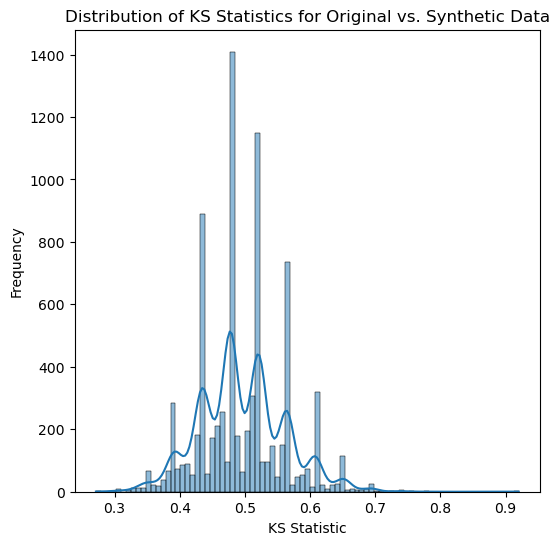

In [9]:
plt.figure(figsize=(6, 6))
sns.histplot(compare_distributions_df['KS Statistic'], kde=True)
plt.title('Distribution of KS Statistics for Original vs. Synthetic Data')
plt.xlabel('KS Statistic')
plt.ylabel('Frequency')
plt.show()

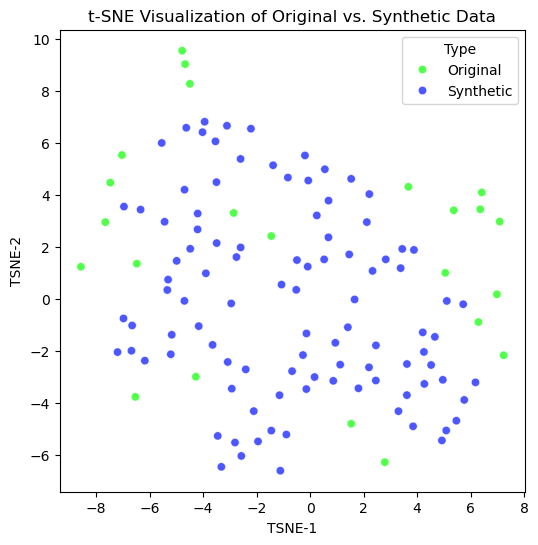

In [10]:
generate_tsne(scaled_data, augmented_df)

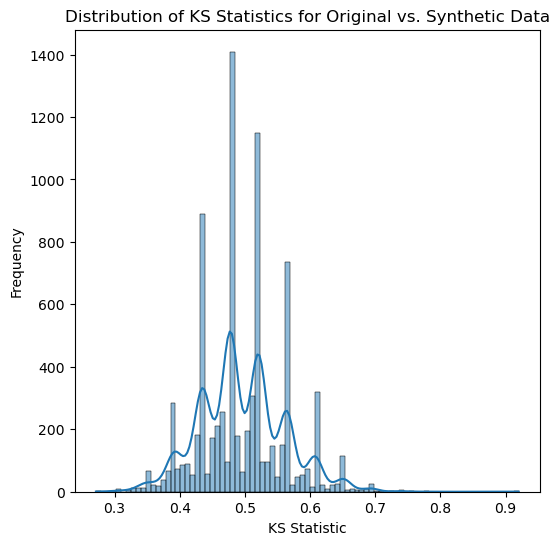

In [11]:
plt.figure(figsize=(6, 6))
sns.histplot(compare_distributions_df['KS Statistic'], kde=True)
plt.title('Distribution of KS Statistics for Original vs. Synthetic Data')
plt.xlabel('KS Statistic')
plt.ylabel('Frequency')
plt.show()

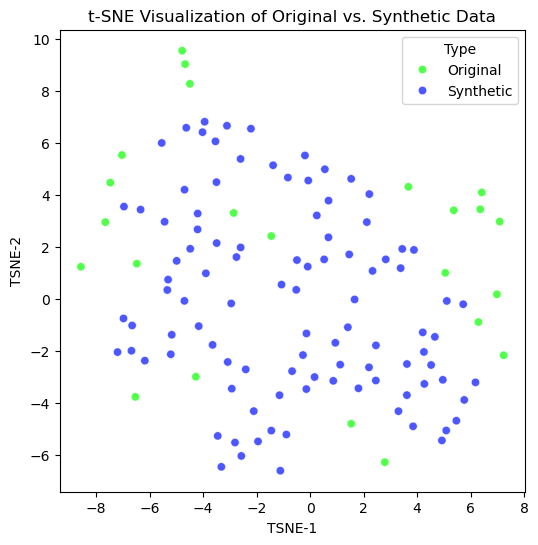

In [12]:
generate_tsne(scaled_data, augmented_df)

# WGAN

In [13]:
dataset, tensor_data, scaled_data, scaler, original_dim = process(dataset_path)

generated_samples = train_and_generate(dataset_path, batch_size=32, epochs=100)

Training WGAN-GP:  33%|███▎      | 1/3 [00:07<00:15,  7.68s/it]

Epoch: 0, Batch: 0, G_loss: 16.038660049438477, C_loss: -100.09228515625


Training WGAN-GP:  67%|██████▋   | 2/3 [00:15<00:07,  7.65s/it]

Epoch: 1, Batch: 0, G_loss: -23.253957748413086, C_loss: -149.90689086914062


Training WGAN-GP: 100%|██████████| 3/3 [00:22<00:00,  7.65s/it]

Epoch: 2, Batch: 0, G_loss: -7.290878772735596, C_loss: -60.12755584716797


In [14]:
generated_df = pd.DataFrame(generated_samples, columns=scaled_data.columns)
df_unscaled = pd.DataFrame(scaler.inverse_transform(generated_df), columns=generated_df.columns)
ks_stats = compare_distributions(scaled_data, df_unscaled)

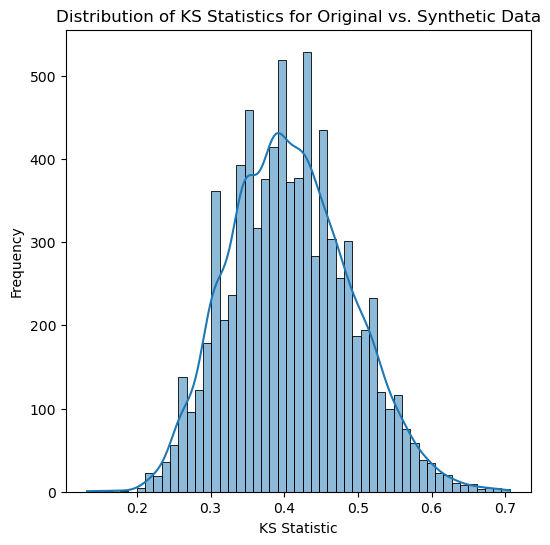

In [15]:
plt.figure(figsize=(6, 6))
sns.histplot(ks_stats['KS Statistic'], kde=True)
plt.title('Distribution of KS Statistics for Original vs. Synthetic Data')
plt.xlabel('KS Statistic')
plt.ylabel('Frequency')
plt.show()

In [16]:
augmented_data_with_variance = recenter_data(df_unscaled, scaled_data)
ks_stats_with_added_variance = compare_distributions(scaled_data, augmented_data_with_variance)

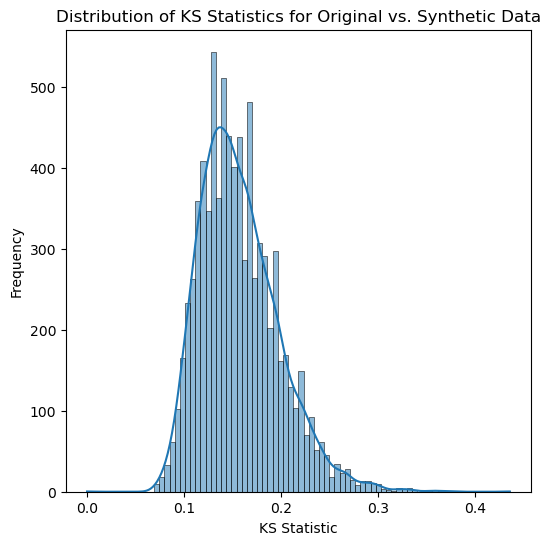

In [17]:
plt.figure(figsize=(6, 6))
sns.histplot(ks_stats_with_added_variance['KS Statistic'], kde=True)
plt.title('Distribution of KS Statistics for Original vs. Synthetic Data')
plt.xlabel('KS Statistic')
plt.ylabel('Frequency')
plt.show()

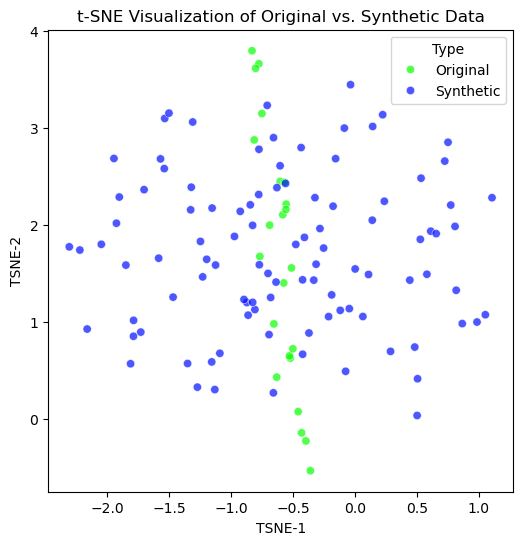

In [18]:
generate_tsne(scaled_data, augmented_data_with_variance)